##  Building a model using PyTorch

The topics covered in this notebook include:
- Data Preparation and Loading
- Building a Model
- Fitting the Model to the Data (training)
- Making Predictions and Evaluating the Model
- Saving and Loading a Model


In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [26]:
torch.__version__   # checking torch version

'2.9.1+cpu'

### **1. Data**

Data can be in any format from excel spreadsheet, images, videos, audios, text etc


We want our data to be in form of numbers for the ML models to learn patterns from it

We will use a linear regression formula to make a straight line with known **parameters**

In [27]:
# Creating known parameters

weight=0.7
bias=0.3

start=0
end=1

step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias


X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
len(X),len(y)

(50, 50)

#### Splitting data into training and testing data

In [29]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [30]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

#### Visualizing training and testing data

In [31]:
# visualizing the data

def plot_predictions(train_data=X_train,train_labels=y_train, test_data=X_test, 
                     test_label=y_test, predictions=None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_label,c="g",s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    plt.legend(prop={"size":14})

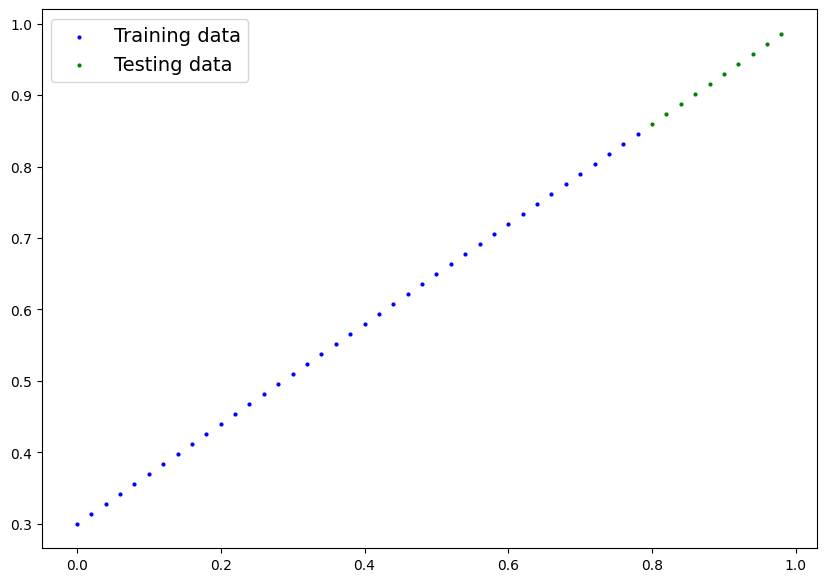

In [32]:
plot_predictions()

#### **2. Building a model**

Lets build a linear regression model on our data


What our model does:
* Start with random values (weights and bias)
* Look at training data and adjust random values to better represent the ideal values (the weights and bias values we used to create the data)

This is done through two main algorithms:
* Gradient Descent 
* Backpropogation


In [33]:
# A simple linear regression model , that learns weights and a bias
from torch import nn
class LinearRegressionModel(nn.Module):  # Subclass nn.Module , contains all building blocks for neural networks
    def __init__(self):
        super().__init__()

        """
        Model Parameters: 
        nn.Parameter tells Pytorch that these parameters should be optimized
        requires_grad=True enables gradient tracking for these parameters

        """
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #requires_grad = true will track gradients of the specific parameter
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

       
    def forward(self,x:torch.Tensor)->torch.Tensor:

        """
        Forward method is used to define how input data is transformed into output prediction
        When we call model(x), the forward method is invoked automatically
        
        """
        return self.weights*x+self.bias   # any subclass on nn.module needs to override forward method
        
#

***torch.nn.Module***

-It is the base class for all nueral netowrk modules. 

-All models should subclass this class

*Documentation for the nn library:*

*https://docs.pytorch.org/docs/stable/nn.html*


**PyTorch model building essentials summary**

* **torch.nn** - contains all of the building blocks necessary for computational graphs (a NN can be considered a computational graph)

* **torch.Parameter** - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* **torch.nn.Module** - the base class for all NN modules if u subclass it u need to override forward() method

* **torch.optim**- this is where the optimizers in PyTorch live, they will help with gradient descent 


* **def forward()** - all nn.Module subclass require you to override forward method, this method defines what happens in the forward computation

* **torch.utils.data.Dataset** - represents a map between key(label) and sample (features) pairs of your data. Such as images and their associated labels

* **torch.utils.data.DataLoader** - creates a python iterable over a torch Dataset(allows you to iterate over your data)

**Checking the contents of our model:**

 What do we have inside our model

 We can check what our model parameters are using .parameters()

In [34]:
torch.manual_seed(42)

# Create an instance of the model

model_0=LinearRegressionModel()
model_0

# Checking the parameters
list(model_0.parameters())

# List named parameters
model_0.state_dict()   # state_dict is a Python dictionary object that maps each layer to its parameter tensor

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

what our model now tries to do is match these weights and biases as close as possible to our predefined weights and bias which was 0.7,0.3 respectively 


In [35]:
# Making predictions using torch.inference_mode() 
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds[:10]

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

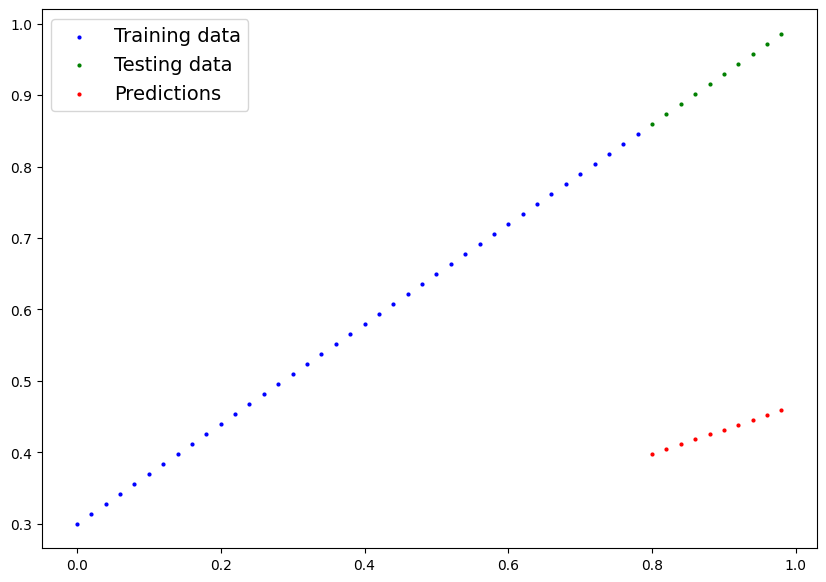

In [36]:
plot_predictions(predictions=y_preds)

As we can see the predicitions are very far , as the parameters are now random, so the predictions are also random


### **3.Train the model**

The purpose of training a model is to move from some unknown parameters(which may be random) to some known parameters

or in other words move from a poor representation of the data to a better presentation of the data

One way to measure how wrong or poor the models predictions are is to use loss/cost/criterion  functions

Things we need to train:

**Loss Functions**: A function to measure how wrong your models predicitons are to the ideal outputs, lower is better 

**Optimizer**: Takes into account the loss of the model and adjust the model's parameters (like weights and biases) to improve the loss function
- Inside a optimizer we need to set two parameters:
    - params- the model parameters you'd like to optimize for example , params=model_0.parameters()
    - lr (learning rate)- is the hyperparameter that defines how big/small optimizer changes the parameters with each step 

In [37]:
# Check the model's parameters (a parameter is a value that the model sets itself during training)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**NOTE:** The choice of optimizer and loss function is highly specific to the problem


In [38]:
# Set up a loss function and optimizer

loss_fn=nn.L1Loss()   # mean absolute error

# Set up optimizer using torch.optim
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)  # stochastic gradient descent

**Building a training loop**

Things need in a training loop:
1. Loop through the data

2. Forward pass - also called forward propogation

3. Calculate the loss (compare forward pass predictions to ground truth labels)

4. Optimizer zero grad

5. Loss backward- move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss (**back propogation**)

6. Optimizer step- the optimiser adjust's our model parameters to try and improve the loss (**gradient descent**)


In [39]:
## Building a training loop
torch.manual_seed(42)

# An epoch is one loop through the data set
epochs=200

# Track different values
epochs_counts=[]
loss_values=[]
test_loss_values=[]

# 1. Loop through the data
for epoch in range(epochs):
    # Set model to training mode
    model_0.train()   # train mode sets all parameters that require gradients to require gradients

    # 2. Forward pass
    y_preds=model_0(X_train)

    # 3. Calculate the loss
    loss=loss_fn(y_preds,y_train)
    print(f"Epoch: {epoch} | Loss: {loss:.5f}")
    # 4. Optimizer zero grad
    optimizer.zero_grad() 
    """
    zero_grad():
    Clears accumulated gradients from the previous step before performing the backward pass
    
    If we dont use this, the gradient would be a combination of the old gradient, which you have already used to update your model parameters and the newly-computed gradient
    """

    # 5. Backward pass - perform backpropagation on the loss
    loss.backward()

    # 6. Step the optimizer- perform gradient descent
    optimizer.step()


    ## Testing loop
    model_0.eval()  # turns off different settings in the model that is not needed for testing
    with torch.inference_mode():   # turns off gradient tracking
        # 1. Forward pass
        test_preds=model_0(X_test)

        # 2. Calculate the loss
        test_loss=loss_fn(test_preds,y_test)

    if epoch % 10==0:
        epochs_counts.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch}| Loss: {loss} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.31288
Epoch:0| Loss: 0.31288138031959534 | Test Loss: 0.48107
Epoch: 1 | Loss: 0.30136
Epoch: 2 | Loss: 0.28984
Epoch: 3 | Loss: 0.27832
Epoch: 4 | Loss: 0.26680
Epoch: 5 | Loss: 0.25528
Epoch: 6 | Loss: 0.24376
Epoch: 7 | Loss: 0.23223
Epoch: 8 | Loss: 0.22071
Epoch: 9 | Loss: 0.20919
Epoch: 10 | Loss: 0.19767
Epoch:10| Loss: 0.1976713240146637 | Test Loss: 0.34636
Epoch: 11 | Loss: 0.18615
Epoch: 12 | Loss: 0.17463
Epoch: 13 | Loss: 0.16311
Epoch: 14 | Loss: 0.15159
Epoch: 15 | Loss: 0.14007
Epoch: 16 | Loss: 0.12855
Epoch: 17 | Loss: 0.11702
Epoch: 18 | Loss: 0.10609
Epoch: 19 | Loss: 0.09681
Epoch: 20 | Loss: 0.08909
Epoch:20| Loss: 0.08908725529909134 | Test Loss: 0.21730
Epoch: 21 | Loss: 0.08228
Epoch: 22 | Loss: 0.07639
Epoch: 23 | Loss: 0.07160
Epoch: 24 | Loss: 0.06748
Epoch: 25 | Loss: 0.06395
Epoch: 26 | Loss: 0.06097
Epoch: 27 | Loss: 0.05846
Epoch: 28 | Loss: 0.05635
Epoch: 29 | Loss: 0.05459
Epoch: 30 | Loss: 0.05315
Epoch:30| Loss: 0.05314852669835090

Keep running the above code and watch how the loss is reducing and try running the next cell that prints the parameter and see how the values are getting closer and closer to the predefined weights and bias, try to bring the loss to 0.01

**What happens at each step inside training loop:**
- We first pass the data through the model for a number of epochs

- Then perform forward() method located within the model object

- Calculate loss value (how wrong the model's predictions are)

- Zero the optimizer gradients (they accumulate every epoch zero them to start fresh each forward pass)

- Perform backpropogation on the loss function (compute the gradient of every parameter with requries_grad=True)

- Step the optimizer to update the model's parameters with respect to the gradients calculated by loss.backward()



**What happens at each step inside testing loop:**
- Put the model in eval mode so that it can turn off functionality such as gradient tracking for inference 

- Turn on torch.inference_mode() to disable functionality such as gradient tracking for inference

- Pass the test data through the model - this will call the model's forward method

- Calculate test loss values and display the information outputs

Text(0, 0.5, 'Loss')

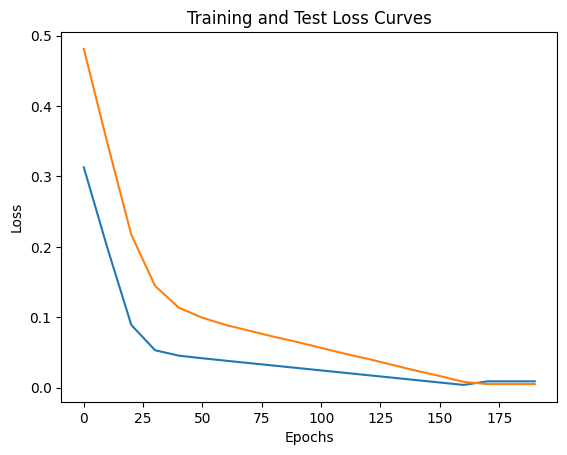

In [40]:
# Plot the loss curve

# Change tensor values as numpy arrays
import numpy as np
loss_values = np.array(torch.tensor(loss_values).numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).numpy())
epochs_counts = np.array(epochs_counts)

plt.plot(epochs_counts,loss_values,label="Train Loss")
plt.plot(epochs_counts,test_loss_values,label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [41]:
with torch.inference_mode():
    y_pred_new=model_0(X_test)

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [43]:
weight,bias

(0.7, 0.3)

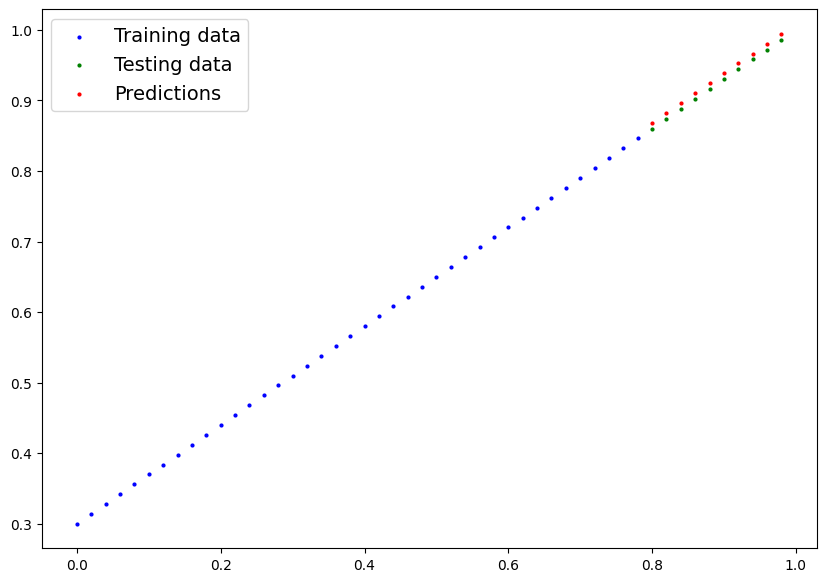

In [44]:
plot_predictions(predictions=y_pred_new)

Notice how previously when we plotted our predictions they were completely way off from the actual values, now the predicitons are much closer to actual values

**Saving a Model**

How can we save a model that we have trained , if in case we are training a very large model we would want to save our model and the resume training later on

Three ways to save and load a model:
1. torch.save() - allows you save a PyTorch object in python's pickle format

2. torch.load()- allows you to load a saved PyTorch object

3. torch.nn.Module.load_state_dict()- this allows to load a models saved state dictionary (saves the parameters of the model)


In [45]:
# Saving our PyTorch model

from pathlib import Path

# Create a models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# Save the model state_dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")


Model saved to: models\01_pytorch_workflow_model_0.pth


**Loading a model**

In [46]:
# Loading a PyTorch model

# Create a new instance of the model class
loaded_model_0=LinearRegressionModel()

# Load the state_dict (parameters) 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [47]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])